In [17]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import os

from urllib.request import Request, urlopen, urlretrieve
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle


In [18]:
# Import data
if not os.path.exists("insurance.csv"):
    url = "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
    req = Request(
        url=url,
        headers={"User-Agent": "Mozilla/5.0"}
    )

    webpage = urlopen(req)

    with open("insurance.csv","wb") as output:
        output.write(webpage.read())

dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [19]:
# Convert categorical data to numbers
dataset["sex"].replace(
    ["female", "male"],
    [0, 1],
    inplace=True
)

dataset["smoker"].replace(
    ["no", "yes"],
    [0, 1],
    inplace=True
)

dataset["region"].replace(
    ['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True
)

dataset = shuffle(dataset).reset_index(drop=True)


<ipython-input-19-23f68f97940f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["sex"].replace(
<ipython-input-19-23f68f97940f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["sex"].replace(
<ipython-input-19-23f68f97940f>:8: FutureWarning: A value is trying to be set on a copy of

In [20]:
# Separating the train and test datasets
train_dataset  = dataset[0:int(0.8*dataset.shape[0])]
test_dataset = dataset[int(0.8*dataset.shape[0]):dataset.shape[0] - 1]

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [23]:
# Creating the model
normalizer = layers.Normalization()
normalizer.adapt(np.array(train_dataset))

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)

model.build()
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (1070, 6)                   │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [24]:
# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12837.1748 - mae: 12837.1748 - mse: 305807264.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5500.6895 - mae: 5500.6895 - mse: 103755568.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3655.2539 - mae: 3655.2539 - mse: 41633256.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3407.8931 - mae: 3407.8931 - mse: 44840364.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2805.2498 - mae: 2805.2498 - mse: 33126576.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2752.1426 - mae: 2752.1426 - mse: 29338992.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2664.7036 - mae: 2664.7036 - mse: 30319738.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2614.3428 - mae: 2614.3428 - mse: 28395332.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2311.5876 - mae: 2311.5876 - mse: 25399508.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━

In [25]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")


9/9 - 0s - 21ms/step - loss: 1772.5240 - mae: 1772.5240 - mse: 22289894.0000
Testing set Mean Abs Error: 1772.52 expenses
You passed the challenge. Great job!


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


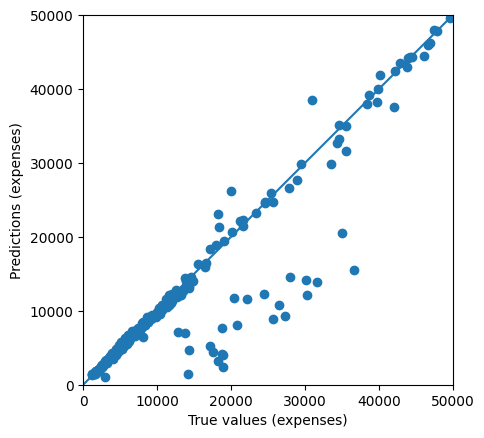

In [26]:
# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)